# Defining performance metrics

# confusion matrix

- recall : 실제 트루값 중 진짜 트루고 예측도 트루인 친구들
- precision : 예측한 트루값중 진짜 트루고 예측도 트루인 친구들

- fscore : single matrix summerize the perform of the model
    - 2pr/(p+r) p : precision, r : recall 

# Designing a baseline model

- you will do well to fisrt model and algorithm already known to perform the bset fpr that task

- you can even trained different dataset for your own problem without having to train it from scratch
- called transfer learning

# Data preprocessing

- When given large amount of training data they extract and learn features from raw data 
- but still need some preprocessing to improve performance of work within specific limitations on the neural network
- such as converting images to grayscale, img resizing, normalization, and data argument


#### grayscale rules
- if you can identity the object with your eyes in grayscale
- dnn will understand too : low computer power

#### image resize
- for input_shape : and computer vision

#### data normalization
- input feature has similar data distribution 
- so we do the normalization

- [0, 1] range make boost learning performance and make the network converge fast 
- HOW to make neural network fast, 
    - small values : [0, 1] values should be in [0, 1]
    - homogenous : All pixels should have values in the same range

<img src="https://blog.kakaocdn.net/dn/bXs8JV/btq54NWJ2P7/L2GQwF18VADgyKO62kgSD1/img.png">

#### show why normalization important
- non normalized features make cost function squished, elongated bowl

<img src="https://blog.kakaocdn.net/dn/c9Y0YD/btq56dnI70a/HX9cOKytmm0b5hUENWRU80/img.png">

# Evaluating the model and interpretung its performance

### Diagnosing oberfitting and underfitting 
- after running you experiment
- want to observe its performance, determine if bottelnecks are impacting its performance

- main cause of poor performance in ML is either overfitting or underfitting the training dataset

#### to diagnose underfitting and overfitting 
- two values ot focus on while training poorly on the validation set

#### if train_error is lower than val error 
- overfitting 
- tuning hyperparameters to avoid overfitting

#### if val error is lower than train_error
- under fitting
- consider adding more hidden layers or train longer or try different neural network architecture

# Code for practice 

In [4]:
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

Using TensorFlow backend.


In [16]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

In [17]:
y = to_categorical(y)

In [24]:
n_train = 800
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

In [25]:
print(train_X.shape, test_X.shape)

(800, 2) (200, 2)


AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [36]:
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(10, input_dim=2, activation='relu'))

model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_6 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 33        
Total params: 368
Trainable params: 368
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=1000, verbose=1)

Train on 800 samples, validate on 200 samples
Epoch 1/1000
800/800 [==============================] - 0s 212us/step - loss: 1.1696 - acc: 0.3275 - val_loss: 1.0331 - val_acc: 0.4050
Epoch 2/1000
800/800 [==============================] - 0s 21us/step - loss: 0.9533 - acc: 0.4788 - val_loss: 0.8703 - val_acc: 0.5900
Epoch 3/1000
800/800 [==============================] - 0s 20us/step - loss: 0.8458 - acc: 0.5750 - val_loss: 0.7870 - val_acc: 0.6350
Epoch 4/1000
800/800 [==============================] - 0s 20us/step - loss: 0.7824 - acc: 0.6275 - val_loss: 0.7217 - val_acc: 0.6800
Epoch 5/1000
800/800 [==============================] - 0s 19us/step - loss: 0.7297 - acc: 0.6750 - val_loss: 0.6694 - val_acc: 0.7250
Epoch 6/1000
800/800 [==============================] - 0s 18us/step - loss: 0.6882 - acc: 0.6987 - val_loss: 0.6284 - val_acc: 0.7450
Epoch 7/1000
800/800 [==============================] - 0s 18us/step - loss: 0.6590 - acc: 0.7075 - val_loss: 0.5995 - val_acc: 0.7450
Epoch 8/

Epoch 61/1000
800/800 [==============================] - 0s 19us/step - loss: 0.4039 - acc: 0.8275 - val_loss: 0.3576 - val_acc: 0.8450
Epoch 62/1000
800/800 [==============================] - 0s 19us/step - loss: 0.4068 - acc: 0.8250 - val_loss: 0.3581 - val_acc: 0.8450
Epoch 63/1000
800/800 [==============================] - 0s 19us/step - loss: 0.4030 - acc: 0.8212 - val_loss: 0.3719 - val_acc: 0.8350
Epoch 64/1000
800/800 [==============================] - 0s 19us/step - loss: 0.4026 - acc: 0.8263 - val_loss: 0.3684 - val_acc: 0.8350
Epoch 65/1000
800/800 [==============================] - 0s 18us/step - loss: 0.4021 - acc: 0.8300 - val_loss: 0.3654 - val_acc: 0.8400
Epoch 66/1000
800/800 [==============================] - 0s 18us/step - loss: 0.4014 - acc: 0.8287 - val_loss: 0.3633 - val_acc: 0.8350
Epoch 67/1000
800/800 [==============================] - 0s 17us/step - loss: 0.4006 - acc: 0.8287 - val_loss: 0.3692 - val_acc: 0.8350
Epoch 68/1000
800/800 [=========================

800/800 [==============================] - 0s 19us/step - loss: 0.3935 - acc: 0.8337 - val_loss: 0.3610 - val_acc: 0.8400
Epoch 122/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3956 - acc: 0.8350 - val_loss: 0.3738 - val_acc: 0.8300
Epoch 123/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3941 - acc: 0.8325 - val_loss: 0.3652 - val_acc: 0.8400
Epoch 124/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3934 - acc: 0.8337 - val_loss: 0.3617 - val_acc: 0.8400
Epoch 125/1000
800/800 [==============================] - 0s 20us/step - loss: 0.3931 - acc: 0.8325 - val_loss: 0.3621 - val_acc: 0.8450
Epoch 126/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3949 - acc: 0.8300 - val_loss: 0.3643 - val_acc: 0.8450
Epoch 127/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3934 - acc: 0.8325 - val_loss: 0.3693 - val_acc: 0.8400
Epoch 128/1000
800/800 [==============================] 

Epoch 181/1000
800/800 [==============================] - 0s 20us/step - loss: 0.3894 - acc: 0.8300 - val_loss: 0.3645 - val_acc: 0.8450
Epoch 182/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3908 - acc: 0.8275 - val_loss: 0.3714 - val_acc: 0.8400
Epoch 183/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3885 - acc: 0.8300 - val_loss: 0.3655 - val_acc: 0.8500
Epoch 184/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3900 - acc: 0.8275 - val_loss: 0.3610 - val_acc: 0.8450
Epoch 185/1000
800/800 [==============================] - 0s 20us/step - loss: 0.3917 - acc: 0.8300 - val_loss: 0.3685 - val_acc: 0.8400
Epoch 186/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3893 - acc: 0.8287 - val_loss: 0.3655 - val_acc: 0.8450
Epoch 187/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3896 - acc: 0.8300 - val_loss: 0.3675 - val_acc: 0.8500
Epoch 188/1000
800/800 [=================

Epoch 241/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3845 - acc: 0.8325 - val_loss: 0.3790 - val_acc: 0.8500
Epoch 242/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3835 - acc: 0.8387 - val_loss: 0.3829 - val_acc: 0.8500
Epoch 243/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3839 - acc: 0.8350 - val_loss: 0.3796 - val_acc: 0.8500
Epoch 244/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3839 - acc: 0.8313 - val_loss: 0.3771 - val_acc: 0.8500
Epoch 245/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3856 - acc: 0.8337 - val_loss: 0.3752 - val_acc: 0.8500
Epoch 246/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3848 - acc: 0.8313 - val_loss: 0.3820 - val_acc: 0.8500
Epoch 247/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3844 - acc: 0.8350 - val_loss: 0.3744 - val_acc: 0.8500
Epoch 248/1000
800/800 [=================

Epoch 301/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3802 - acc: 0.8313 - val_loss: 0.3891 - val_acc: 0.8400
Epoch 302/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3814 - acc: 0.8387 - val_loss: 0.3943 - val_acc: 0.8450
Epoch 303/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3830 - acc: 0.8350 - val_loss: 0.3912 - val_acc: 0.8400
Epoch 304/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3824 - acc: 0.8400 - val_loss: 0.3987 - val_acc: 0.8400
Epoch 305/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3802 - acc: 0.8375 - val_loss: 0.3848 - val_acc: 0.8400
Epoch 306/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3804 - acc: 0.8313 - val_loss: 0.3964 - val_acc: 0.8400
Epoch 307/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3826 - acc: 0.8337 - val_loss: 0.3894 - val_acc: 0.8400
Epoch 308/1000
800/800 [=================

Epoch 361/1000
800/800 [==============================] - 0s 20us/step - loss: 0.3793 - acc: 0.8375 - val_loss: 0.3955 - val_acc: 0.8400
Epoch 362/1000
800/800 [==============================] - 0s 21us/step - loss: 0.3804 - acc: 0.8387 - val_loss: 0.3945 - val_acc: 0.8400
Epoch 363/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3802 - acc: 0.8375 - val_loss: 0.3929 - val_acc: 0.8400
Epoch 364/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3783 - acc: 0.8337 - val_loss: 0.3987 - val_acc: 0.8400
Epoch 365/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3801 - acc: 0.8375 - val_loss: 0.3912 - val_acc: 0.8400
Epoch 366/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3786 - acc: 0.8400 - val_loss: 0.3996 - val_acc: 0.8400
Epoch 367/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3789 - acc: 0.8387 - val_loss: 0.3997 - val_acc: 0.8400
Epoch 368/1000
800/800 [=================

Epoch 421/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3784 - acc: 0.8412 - val_loss: 0.3990 - val_acc: 0.8450
Epoch 422/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3785 - acc: 0.8375 - val_loss: 0.4006 - val_acc: 0.8450
Epoch 423/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3787 - acc: 0.8350 - val_loss: 0.3956 - val_acc: 0.8400
Epoch 424/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3787 - acc: 0.8375 - val_loss: 0.3980 - val_acc: 0.8400
Epoch 425/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3762 - acc: 0.8387 - val_loss: 0.3985 - val_acc: 0.8400
Epoch 426/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3775 - acc: 0.8387 - val_loss: 0.3975 - val_acc: 0.8400
Epoch 427/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3787 - acc: 0.8325 - val_loss: 0.4049 - val_acc: 0.8400
Epoch 428/1000
800/800 [=================

Epoch 481/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3786 - acc: 0.8375 - val_loss: 0.4035 - val_acc: 0.8400
Epoch 482/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3756 - acc: 0.8400 - val_loss: 0.4137 - val_acc: 0.8400
Epoch 483/1000
800/800 [==============================] - 0s 20us/step - loss: 0.3758 - acc: 0.8412 - val_loss: 0.3956 - val_acc: 0.8400
Epoch 484/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3767 - acc: 0.8362 - val_loss: 0.4075 - val_acc: 0.8450
Epoch 485/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3759 - acc: 0.8412 - val_loss: 0.4075 - val_acc: 0.8400
Epoch 486/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3757 - acc: 0.8425 - val_loss: 0.4034 - val_acc: 0.8400
Epoch 487/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3768 - acc: 0.8400 - val_loss: 0.4009 - val_acc: 0.8400
Epoch 488/1000
800/800 [=================

Epoch 541/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3769 - acc: 0.8400 - val_loss: 0.3990 - val_acc: 0.8400
Epoch 542/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3756 - acc: 0.8362 - val_loss: 0.4106 - val_acc: 0.8450
Epoch 543/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3747 - acc: 0.8438 - val_loss: 0.4123 - val_acc: 0.8400
Epoch 544/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3737 - acc: 0.8400 - val_loss: 0.4046 - val_acc: 0.8400
Epoch 545/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3748 - acc: 0.8375 - val_loss: 0.4100 - val_acc: 0.8400
Epoch 546/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3762 - acc: 0.8438 - val_loss: 0.4046 - val_acc: 0.8400
Epoch 547/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3775 - acc: 0.8337 - val_loss: 0.4107 - val_acc: 0.8450
Epoch 548/1000
800/800 [=================

Epoch 601/1000
800/800 [==============================] - 0s 20us/step - loss: 0.3759 - acc: 0.8400 - val_loss: 0.4121 - val_acc: 0.8400
Epoch 602/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3725 - acc: 0.8375 - val_loss: 0.4125 - val_acc: 0.8400
Epoch 603/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3738 - acc: 0.8438 - val_loss: 0.4059 - val_acc: 0.8400
Epoch 604/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3741 - acc: 0.8412 - val_loss: 0.4114 - val_acc: 0.8400
Epoch 605/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3759 - acc: 0.8400 - val_loss: 0.4098 - val_acc: 0.8400
Epoch 606/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3739 - acc: 0.8375 - val_loss: 0.4081 - val_acc: 0.8400
Epoch 607/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3743 - acc: 0.8400 - val_loss: 0.4068 - val_acc: 0.8400
Epoch 608/1000
800/800 [=================

Epoch 661/1000
800/800 [==============================] - 0s 20us/step - loss: 0.3733 - acc: 0.8412 - val_loss: 0.4125 - val_acc: 0.8350
Epoch 662/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3739 - acc: 0.8412 - val_loss: 0.4153 - val_acc: 0.8400
Epoch 663/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3744 - acc: 0.8412 - val_loss: 0.4092 - val_acc: 0.8400
Epoch 664/1000
800/800 [==============================] - 0s 20us/step - loss: 0.3742 - acc: 0.8425 - val_loss: 0.4082 - val_acc: 0.8400
Epoch 665/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3743 - acc: 0.8350 - val_loss: 0.4173 - val_acc: 0.8400
Epoch 666/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3732 - acc: 0.8400 - val_loss: 0.4160 - val_acc: 0.8400
Epoch 667/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3738 - acc: 0.8425 - val_loss: 0.4155 - val_acc: 0.8350
Epoch 668/1000
800/800 [=================

Epoch 721/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3739 - acc: 0.8438 - val_loss: 0.4214 - val_acc: 0.8350
Epoch 722/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3743 - acc: 0.8375 - val_loss: 0.4195 - val_acc: 0.8350
Epoch 723/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3728 - acc: 0.8400 - val_loss: 0.4130 - val_acc: 0.8350
Epoch 724/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3728 - acc: 0.8500 - val_loss: 0.4126 - val_acc: 0.8350
Epoch 725/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3725 - acc: 0.8412 - val_loss: 0.4129 - val_acc: 0.8400
Epoch 726/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3696 - acc: 0.8463 - val_loss: 0.4145 - val_acc: 0.8400
Epoch 727/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3714 - acc: 0.8375 - val_loss: 0.4177 - val_acc: 0.8350
Epoch 728/1000
800/800 [=================

Epoch 781/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3733 - acc: 0.8387 - val_loss: 0.4213 - val_acc: 0.8400
Epoch 782/1000
800/800 [==============================] - 0s 20us/step - loss: 0.3749 - acc: 0.8438 - val_loss: 0.4161 - val_acc: 0.8300
Epoch 783/1000
800/800 [==============================] - 0s 20us/step - loss: 0.3720 - acc: 0.8375 - val_loss: 0.4117 - val_acc: 0.8300
Epoch 784/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3697 - acc: 0.8425 - val_loss: 0.4210 - val_acc: 0.8400
Epoch 785/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3720 - acc: 0.8387 - val_loss: 0.4115 - val_acc: 0.8350
Epoch 786/1000
800/800 [==============================] - 0s 17us/step - loss: 0.3713 - acc: 0.8450 - val_loss: 0.4135 - val_acc: 0.8300
Epoch 787/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3706 - acc: 0.8412 - val_loss: 0.4216 - val_acc: 0.8350
Epoch 788/1000
800/800 [=================

Epoch 841/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3726 - acc: 0.8362 - val_loss: 0.4161 - val_acc: 0.8350
Epoch 842/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3711 - acc: 0.8387 - val_loss: 0.4101 - val_acc: 0.8450
Epoch 843/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3701 - acc: 0.8387 - val_loss: 0.4162 - val_acc: 0.8450
Epoch 844/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3714 - acc: 0.8412 - val_loss: 0.4218 - val_acc: 0.8400
Epoch 845/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3730 - acc: 0.8387 - val_loss: 0.4213 - val_acc: 0.8450
Epoch 846/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3701 - acc: 0.8438 - val_loss: 0.4175 - val_acc: 0.8450
Epoch 847/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3702 - acc: 0.8325 - val_loss: 0.4205 - val_acc: 0.8450
Epoch 848/1000
800/800 [=================

Epoch 901/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3725 - acc: 0.8263 - val_loss: 0.4198 - val_acc: 0.8350
Epoch 902/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3716 - acc: 0.8425 - val_loss: 0.4200 - val_acc: 0.8450
Epoch 903/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3714 - acc: 0.8387 - val_loss: 0.4261 - val_acc: 0.8350
Epoch 904/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3697 - acc: 0.8400 - val_loss: 0.4112 - val_acc: 0.8450
Epoch 905/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3693 - acc: 0.8350 - val_loss: 0.4258 - val_acc: 0.8350
Epoch 906/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3720 - acc: 0.8450 - val_loss: 0.4229 - val_acc: 0.8450
Epoch 907/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3699 - acc: 0.8400 - val_loss: 0.4181 - val_acc: 0.8350
Epoch 908/1000
800/800 [=================

Epoch 961/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3678 - acc: 0.8412 - val_loss: 0.4181 - val_acc: 0.8400
Epoch 962/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3702 - acc: 0.8350 - val_loss: 0.4264 - val_acc: 0.8400
Epoch 963/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3743 - acc: 0.8463 - val_loss: 0.4098 - val_acc: 0.8450
Epoch 964/1000
800/800 [==============================] - 0s 18us/step - loss: 0.3678 - acc: 0.8412 - val_loss: 0.4340 - val_acc: 0.8350
Epoch 965/1000
800/800 [==============================] - 0s 20us/step - loss: 0.3703 - acc: 0.8425 - val_loss: 0.4255 - val_acc: 0.8400
Epoch 966/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3672 - acc: 0.8387 - val_loss: 0.4100 - val_acc: 0.8450
Epoch 967/1000
800/800 [==============================] - 0s 19us/step - loss: 0.3716 - acc: 0.8425 - val_loss: 0.4242 - val_acc: 0.8450
Epoch 968/1000
800/800 [=================

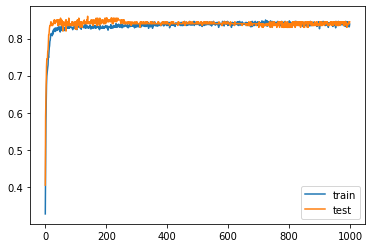

In [38]:
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

# Collecting more data or tuning hyperparameters

- tip 
    - hyperparameters : we don't set, automatic learn and tune, weight bias
    - parameters : we set !, like epochs learning rate... 

## Network architecture